##Dataset music & text generator

## Libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import torch 
import numpy as np 
import os
import json 
import pandas as pd
from tqdm.auto import tqdm

ROOT_DATA = "/content/gdrive/MyDrive/IDL_Project/data"
AUDIOSET="/content/gdrive/MyDrive/IDL_Project/data/audioset"
audioset_paths = {
    "eval": os.path.join(AUDIOSET,"csvs","eval_segments.csv"),
}

In [3]:
!pip install yt-dlp -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.7 MB/s eta 0:00:00


## Download Audio

### AudioSet

In [ ]:
#Download CSVs
!curl -wget http://storage.googleapis.com/us_audioset/youtube_corpus/v1/csv/eval_segments.csv > "{AUDIOSET}/csvs/eval_segments.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1116k  100 1116k    0     0  6568k      0 --:--:-- --:--:-- --:--:-- 6568k


In [ ]:
!git clone https://github.com/aoifemcdonagh/audioset-processing.git
%cd /content/audioset-processing/
!pip install -r requirements.txt -q

Cloning into 'audioset-processing'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 228 (delta 45), reused 40 (delta 40), pack-reused 177
Receiving objects: 100% (228/228), 12.85 MiB | 8.65 MiB/s, done.
Resolving deltas: 100% (119/119), done.
/content/audioset-processing
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.1 MB/s eta 0:00:00


In [ ]:
#TODO: Change utils.py yt-dlp
#!rm -R output/

In [ ]:
%cd /content/audioset-processing/
!python3 process.py download -s "STRICT" -c "Music" --csv_dataset "./data/eval_segments.csv"

In [ ]:
!yt-dlp -f 'bestaudio' -g https://www.youtube.com/embed/sReGQj67HJU?&start=10&end=20

https://rr1---sn-q4fzen7e.googlevideo.com/videoplayback?expire=1679911475&ei=0xUhZKarAY_Ckgapm4DIBA&ip=34.125.231.200&id=o-AA8YkljanIUoMy4sEzVFwQHgPdjBwEPHxX1kh_BQ8jjo&itag=251&source=youtube&requiressl=yes&mh=85&mm=31%2C29&mn=sn-q4fzen7e%2Csn-q4fl6n6d&ms=au%2Crdu&mv=u&mvi=1&pl=24&spc=99c5CTzrWPxNvNRUJq50nR_KpY2HYg0&vprv=1&svpuc=1&mime=audio%2Fwebm&gir=yes&clen=3891694&dur=239.101&lmt=1657732809298785&mt=1679889506&fvip=4&keepalive=yes&fexp=24007246&c=ANDROID&txp=5532434&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cspc%2Cvprv%2Csvpuc%2Cmime%2Cgir%2Cclen%2Cdur%2Clmt&sig=AOq0QJ8wRgIhAMAVnTX8ELsRNKWuYfZ_amBYFKl1k6UXceLY4EYQT1XwAiEAqGHL7lHwvMsHlVfVFG0jwfuNeUOchBx77K725QTE8k0%3D&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl&lsig=AG3C_xAwRgIhANhqbpFXdkFnaIw73_Svvxnq4HqCpECs-CrmvWvnTLaRAiEAgB7gZiY9U5bbkQPKp2E8cpxxvidm5oWbIs7bCIfzCLE%3D


In [ ]:
!du -h "/content/audioset-processing/output"
!ls -R1 "/content/audioset-processing/output" | wc -l

4.0K	/content/audioset-processing/output/Happy music/.ipynb_checkpoints
33M	/content/audioset-processing/output/Happy music
33M	/content/audioset-processing/output
58


In [ ]:
!cp -fr "/content/audioset-processing/output/." "{AUDIOSET}/sounds"

In [ ]:
audio_set_metadata = pd.read_csv("/content/audioset-processing/data/eval_segments.csv", header=None)
labels_dict = pd.read_csv("/content/audioset-processing/data/class_labels_indices.csv", index_col=0)

In [ ]:
!cp -fr  "{AUDIOSET}/sounds/." "/content/audioset-processing/output/"

### Jamendo

### FMA

In [ ]:
!curl -O https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
!echo "f0df49ffe5f2a6008d7dc83c6915b31835dfe733  fma_metadata.zip" | sha1sum -c -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  341M  100  341M    0     0  23.8M      0  0:00:14  0:00:14 --:--:-- 27.0M
fma_metadata.zip: OK


In [ ]:
!mkdir fma

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/fma_metadata.zip", 'r')
zip_ref.extractall("/content/fma")
zip_ref.close()

In [ ]:
!pip install ast -q

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import ast 

def load(filepath):

    filename = os.path.basename(filepath)

    if 'features' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'echonest' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'genres' in filename:
        return pd.read_csv(filepath, index_col=0)

    if 'tracks' in filename:
        tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

        COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
                   ('track', 'genres'), ('track', 'genres_all')]
        for column in COLUMNS:
            tracks[column] = tracks[column].map(ast.literal_eval)

        COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
                   ('album', 'date_created'), ('album', 'date_released'),
                   ('artist', 'date_created'), ('artist', 'active_year_begin'),
                   ('artist', 'active_year_end')]
        for column in COLUMNS:
            tracks[column] = pd.to_datetime(tracks[column])

        SUBSETS = ('small', 'medium', 'large')
        try:
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                    'category', categories=SUBSETS, ordered=True)
        except (ValueError, TypeError):
            # the categories and ordered arguments were removed in pandas 0.25
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                     pd.CategoricalDtype(categories=SUBSETS, ordered=True))

        COLUMNS = [('track', 'genre_top'), ('track', 'license'),
                   ('album', 'type'), ('album', 'information'),
                   ('artist', 'bio')]
        for column in COLUMNS:
            tracks[column] = tracks[column].astype('category')

        return tracks


In [ ]:
tracks = load("/tmp/fma_metadata/tracks.csv")

In [ ]:
with_tags = tracks["track"][tracks["track"]["tags"].str.len() != 0]
tags = list(with_tags["tags"])

In [ ]:
from collections import Counter
sum = 0
count = 0
tags_s = Counter()
list_lens = []
for tag in tags:
  list_lens.append(len(tag))
  sum+= len(tag)
  count +=1
  tags_s.update(tag)
sum/count

7.021450459652707

In [ ]:
len(tags_s)

4992

In [ ]:
top_500 = tags_s.most_common()[:500]
set_top_500 = set([tag for tag, count in top_500])

In [ ]:
with_tags

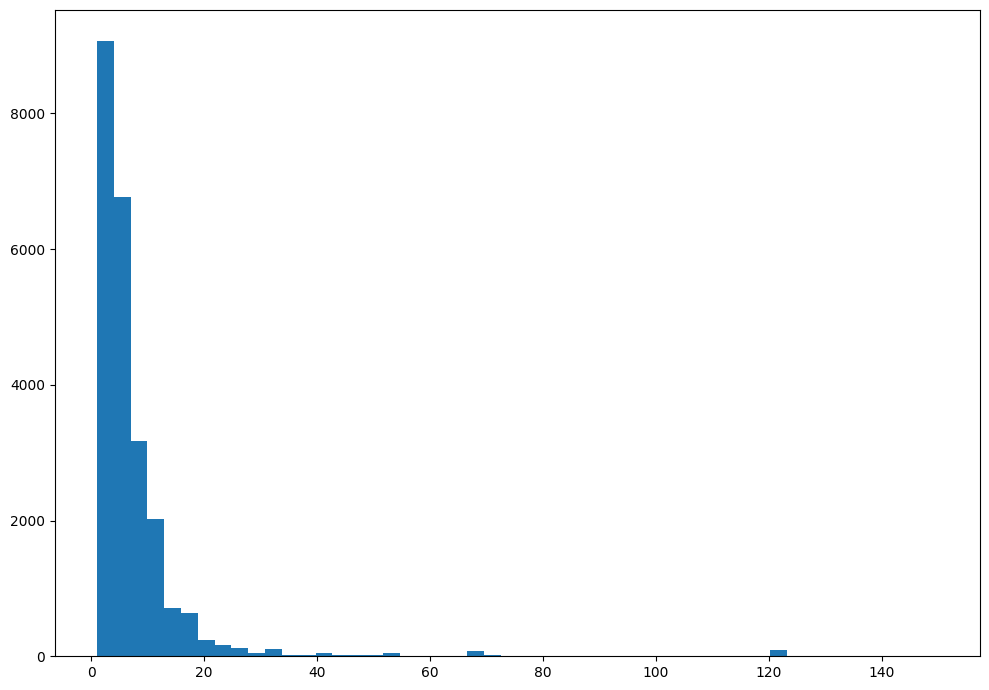

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
 
n_bins = 50

fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(list_lens, bins = n_bins)
 
# Show plot
plt.show()

In [ ]:
genres = load('/tmp/fma_metadata/genres.csv')

In [ ]:
genre_map = dict(genres["title"].str.lower())

In [ ]:
set_top_500

In [ ]:
with_tags["tags"]

track_id
137                                                 [lafms]
138                                                 [lafms]
850                                             [baltimore]
851                                             [baltimore]
852                                             [baltimore]
                                ...                        
155269    [dark ambient, dark, ambient, noise, experimen...
155275    [noise, stretching is magic, free music, sampl...
155276    [noise, stretching is magic, free music, sampl...
155277    [noise, stretching is magic, free music, sampl...
155320    [ballad, epic, rockabilly, curse, hex, hard ro...
Name: tags, Length: 23496, dtype: object

In [ ]:
with_tags["genres_all"].map(lambda list_genre: [genre_map[genre] for genre in list_genre])

track_id
137                      [noise, avant-garde, experimental]
138                      [noise, avant-garde, experimental]
850                                                  [rock]
851                                                  [rock]
852                                                  [rock]
                                ...                        
155269    [ambient electronic, ambient, electronic, inst...
155275                    [noise, experimental, electronic]
155276                    [noise, experimental, electronic]
155277                    [noise, experimental, electronic]
155320                     [rockabilly, pop, rock, country]
Name: genres_all, Length: 23496, dtype: object

In [ ]:
with_tags["full_tags"] = with_tags["tags"].map(lambda tags: [tag for tag in tags if tag in set_top_500]) + with_tags["genres_all"].map(lambda list_genre: [genre_map[genre] for genre in list_genre])

In [ ]:
with_tags = with_tags[(with_tags["full_tags"].str.len() !=0) & (with_tags["full_tags"].str.len() <=15)]

In [ ]:
len(with_tags)

22172

<Axes: >

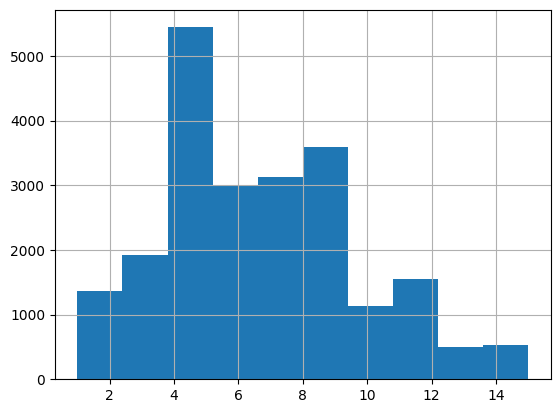

In [ ]:
with_tags["full_tags"].str.len().hist()

In [ ]:
!mkdir -p "/content/gdrive/MyDrive/IDL Project/data/fma/tags"

In [ ]:
with_tags[["full_tags"]]

,full_tags
track_id,
137,"[noise, avant-garde, experimental]"
138,"[noise, avant-garde, experimental]"
850,[rock]
851,[rock]
852,[rock]
...,...
155269,"[dark ambient, dark, ambient, noise, experimen..."
155275,"[noise, free music, psychedelic, public domain..."
155276,"[noise, free music, psychedelic, public domain..."


In [ ]:
with_tags.to_csv("/content/gdrive/MyDrive/IDL Project/data/fma/tags/fma_filtered_tagged.csv")

In [ ]:
tracks["track"]["interest"].max()

3293557

In [ ]:
filter = tracks["track"]["interest"]>=100000

In [ ]:
tracks[["track","artist"]][filter]

In [ ]:
tracks["artist"][tracks["artist"]["favorites"]> 1000]

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,


### One Million

#### Metadata

In [ ]:
#!curl -O http://millionsongdataset.com/sites/default/files/lastfm/lastfm_train.zip
!curl -O http://millionsongdataset.com/sites/default/files/lastfm/lastfm_subset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.3M  100 12.3M    0     0  17.3M      0 --:--:-- --:--:-- --:--:-- 17.3M


In [ ]:
!unzip /content/lastfm_subset.zip

In [ ]:
!pip install simplejson -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
import simplejson as json
import glob
from collections import Counter 
pattern  = "/content/lastfm_subset/*/*/*/*.json"
tags = Counter()
for file_path in glob.glob(pattern):
  with open(file_path, "r") as file:
    str_f = file.read()
    json_file = json.loads(str_f)
    tags.update([tags[0] for tags in json_file["tags"]])

In [ ]:
json_file["tags"]

[['Bay Area', '100'],
 ['hieroglyiphics', '100'],
 ['classic', '50'],
 ['Hip-Hop', '50'],
 ['stream', '50'],
 ['OG', '50'],
 ['1979-2006: A Hip-Hop Odyssey - 800 Tracks In A 48 Minute Mix', '50'],
 ['heiroglyphics', '50'],
 ['oaksterdamn', '50'],
 ['heard on Pandora', '0']]

In [ ]:
len(glob.glob(pattern))

9330

In [ ]:
filtered_tags = set([tag for tag, count in tags.most_common() if count > 10])
list(filtered_tags)[-50:]

['country legends',
 'aerosmith',
 'americain',
 'indie rock',
 'Genialne',
 'Favorite Artists',
 'lol',
 'latin pop',
 'best of 2008',
 'ruhig',
 "90's",
 'catchy',
 'bestone',
 'stand-up',
 'hiphop',
 'english',
 'noise rock',
 'european',
 '1983',
 'essential',
 'Reflective',
 'female vocal',
 'Progressive rock',
 'favorites',
 'breakingbluesnews',
 "60's",
 'epic metal',
 'electropop',
 'best songs ever',
 'slow',
 'hip-hop favorites',
 'friendsofthekingofrummelpop',
 'french',
 '5',
 'repetitive melodic phrasing',
 'norwegian',
 'heard on Pandora',
 'loved',
 'kot',
 '1977',
 'aitchawake',
 'Classical',
 '1993',
 'it is party time',
 'slgdmtopalbums',
 '1994',
 'vocalization',
 'lobest',
 'favourite tracks',
 'Acoustic Rock']

In [ ]:
songs_tags = []
for file_path in glob.glob(pattern):
  with open(file_path, "r") as file:
    str_f = file.read()
    song_data = json.loads(str_f)
    song_data["tags"] = [tags[0].lower() for tags in song_data["tags"] if tags[0] in filtered_tags]
    if len(song_data["tags"]) > 0:
      if "similars" in song_data:
        del song_data["similars"]
      songs_tags.append(song_data)

In [ ]:
del json_file['similars']

In [ ]:
msd_data = pd.DataFrame(songs_tags)
msd_data

,artist,timestamp,tags,track_id,title
0,The Panic Channel,2011-09-08 00:48:40.902050,"[rock, alternative rock]",TRAJJBG128F148A7CA,Awake
1,The Galactic Heroes,2011-09-07 19:26:38.245099,"[nice, twee]",TRAJJMN128F9321946,Cherokee
2,Fu-Schnickens,2011-08-05 02:53:45.051717,"[rap, hip-hop, 1992, rnb, rhythm and blues, le...",TRAJJNB128F42A0A4F,Heavenly Father
3,Chris Standring,2011-08-11 16:01:37.365661,[smooth jazz],TRAJJCI12903CE53D7,Fat Tuesday
4,Cats in Boots,2011-08-11 19:01:14.739550,"[80s, rock, hard rock, hair metal, 80s hard rock]",TRAJIKY128F932AD73,Shot Gun Sally
...,...,...,...,...,...
4223,The Mars Volta,2011-08-11 08:32:30.700389,"[progressive rock, experimental, rock, alterna...",TRBBBUG128F148D65B,Inertiatic Esp
4224,Slackbaba,2011-08-12 15:24:56.478140,"[psychedelic, 2006, trippy, 00s, breaks, chill...",TRBBBKS12903CDFCF4,Sea Of Green
4225,Sunscreem,2011-08-15 23:09:58.175604,"[nu jazz, trance, electronic, dance, electroni...",TRBBBLA128F424E963,Exodus
4226,Fu-Schnickens,2011-08-12 10:14:39.972923,"[hip-hop, hip hop, hiphop, new york, old schoo...",TRBBBMT128F42A0A4E,True Fuschnick


In [ ]:
!mkdir -p "/content/gdrive/MyDrive/IDL Project/data/msd/tags"

In [ ]:
msd_data.to_csv("/content/gdrive/MyDrive/IDL Project/data/msd/tags/msd_subset_tagged_filtered.csv")

<Axes: >

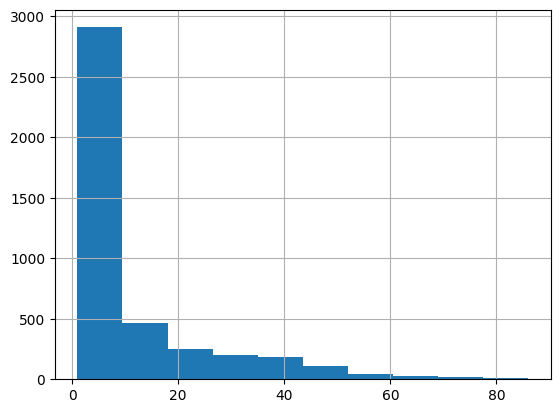

In [ ]:
msd_data["tags"].str.len().hist()

In [ ]:
len(msd_data[msd_data["tags"].str.len() == 1])

881

In [ ]:
len(msd_data["tags"])

4228

In [ ]:
" ,".join(msd_data["tags"][7])

"spanish ,rnb ,2007 ,español ,espanol ,r'n'b ,texas ,00s ,urban ,r&b ,r and b ,female vocalists ,american ,favorites ,vocal ,singer-songwriter ,pop ,female vocalist ,latin ,soul"

#### Full data reader

In [ ]:
!ls -l ~

total 16
-rw-r--r-- 1 root root 1159 Apr 21 19:11 A.tsv
-rw-r--r-- 1 root root 2163 Apr 21 19:11 B.tsv
-rw-r--r-- 1 root root 1506 Apr 21 19:11 C.tsv
-rw-r--r-- 1 root root 2867 Apr 21 19:07 test.tsv


In [ ]:
import glob
import h5py
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import gc


ROOT_DATA = "/mnt/snap/data" #"/content" #"/mnt/snap/data" #"/content" #
SAVE_PATH = "/home/ubuntu/data"  #"/root"#"/home/ubuntu/data"  #"/root"#
done_files = ["".join(file_name.split("/")[-1:]) for file_name in glob.glob(f"{SAVE_PATH}/*.tsv")]
print(done_files)
analysis_cols = ['audio_md5',
  'danceability',
  'duration',
  'end_of_fade_in',
  'energy',
  'tempo',
  'time_signature',
  'time_signature_confidence',
  'track_id',
  'key',
  'key_confidence',
  'loudness',
  'mode',
  'mode_confidence']
metadata_cols = ["song_id", "artist_name", "title", "artist_familiarity"	, "artist_id" , "artist_location", "artist_hotttnesss" ,"genre", "track_7digitalid"]

main_folders = glob.glob(f"{ROOT_DATA}/*/*/")
for i, main_folder in enumerate(main_folders):
  tsv_name = "".join(main_folder.split("/")[-3:])
  if f"{tsv_name}.tsv" in done_files:
    print(f"{i+1}/{len(main_folders)}|{tsv_name} already exists...")
    continue

  files = glob.glob(f"{main_folder}/**/*.h5", recursive=True)
  files_found = len(files)
  print(f"{i+1}/{len(main_folders)}|{main_folder} Found", files_found)
  if files_found == 0:
    continue
  rows = []
  analysis_all = []
  mbtags_all = []
  for file_name in tqdm(files):
    with h5py.File(file_name, 'r') as f:
      # Get the keys of the datasets in the h5 file
      analysis = f["/analysis"]["songs"][()] 
      metadata = f["/metadata"]["songs"][()]
      mbtags = f["/musicbrainz"]["artist_mbtags"][()]
      mbtags_all.append(mbtags)
      analysis_all.append(analysis)
      rows.append(metadata)

  print("Concatenating...")
  dataset = pd.DataFrame(np.concatenate(rows,axis=0))
  analysis_all = np.concatenate(analysis_all,axis=0)
  dataset["mbtags"] = mbtags_all

  print("Adding analysis cols...")
  for col in analysis_cols:
    dataset[col] = analysis_all[col]

  print("Fixing types...")
  for col, dtype in dataset.dtypes.items():
    if dtype == object or dtype=="|S32":  # Only process object columns.
        # decode, or return original value if decode return Nan
        dataset[col] = dataset[col].str.decode('utf-8').fillna(dataset[col]) 
  print("Saving...")
  dataset.to_csv(f"{SAVE_PATH}/{tsv_name}.tsv", sep="\t")
  del dataset, rows, analysis_all, mbtags_all, files
  gc.collect()

['contentZC.tsv', 'snapdataCC.tsv', 'B.tsv', 'ZB.tsv', 'C.tsv', 'test.tsv', 'ZC.tsv', 'contentZB.tsv', 'contentZA.tsv', 'ZA.tsv', 'A.tsv']
1/3|B already exists...
2/3|A already exists...
3/3|C already exists...


In [ ]:
dataset[["song_id", "artist_name", "title", "artist_familiarity"	, "artist_id" , "artist_location", "artist_hotttnesss" ,"genre", "track_7digitalid"]]

,song_id,artist_name,title,artist_familiarity,artist_id,artist_location,artist_hotttnesss,genre,track_7digitalid
0,SOWUFYS12AAF3B23A5,Planisphere,Little Green Dwarf,0.448981,ARRJL9M1187B98FCC8,,0.367281,,5337371
1,SOCOUSO12AB01892E1,Krishna Das,Shri Ram Jai Ram,0.585908,ARK92UQ1187FB53121,New York,0.416716,,7645824
2,SOZMYYX12A6D4F805A,Patrice Rushen,Time Will Tell (LP Version),0.593965,AR5HHQX1187FB490B9,"Los Angeles, CA",0.418622,,438875
3,SOUDXGX12A8C1378CF,The Terrorist,Speed Violence (Mystro Remix),0.473286,ARBAKL21187FB3D343,,0.269524,,2260739
4,SOXQUSV12AB018359A,Silk,Kakaiba,0.698657,ARZUWUC1187FB54557,India,0.458711,,6296747
5,SOWZWCD12AB0187B60,Bobby Bare,For The Good Times,0.563744,ARYWN7S1187FB43A41,"Ironton, OH",0.387270,,6341117
6,SOFSOCN12A8C143F5D,Gob,Face the Ashes,0.651046,ARXR32B1187FB57099,,0.401724,,6795666


In [ ]:
dataset.to_csv("~/test.tsv", sep="\t")

/content


In [ ]:
pd.read_csv("~/snapdataCC.tsv", sep="\t", index_col=0)

,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,...,energy,tempo,time_signature,time_signature_confidence,track_id,key,key_confidence,loudness,mode,mode_confidence
0,NaN,27724,0.559823,0.391484,ARE93YV1187B9937CC,7.36529,Cameroon,12.34344,bc30924c-1900-41c3-9a97-41a93433836f,Baka Beyond,...,0.0,139.092,4,0.000,TRCCCRP128F147BEFA,9,0.588,-11.482,0,0.367
1,NaN,20790,0.503821,0.397711,AROSQW61187FB5330B,47.03922,"Olympia, WA",-122.89143,4cda00d8-55d3-42cd-b5e3-5e1934406eaa,The Fleetwoods,...,0.0,87.650,4,0.769,TRCCCDI128F427CC1F,5,0.595,-15.193,1,0.519
2,NaN,52287,0.705876,0.620948,ARNZ70R1187B9A4824,NaN,"Westbury, Long Island, NY",NaN,29762c82-bb92-4acd-b1fb-09cc4da250d2,Joe Satriani,...,0.0,87.875,4,0.895,TRCCCMQ128F42AE752,7,0.100,-4.707,1,0.393
3,NaN,140335,0.620827,0.288014,AR69ZA21187FB39948,43.74270,Michigan,-84.62167,913096b7-10dc-41ca-9777-f299df45e9e2,BIZ,...,0.0,97.997,4,0.624,TRCCCKF128F424C3D3,9,0.783,-5.972,1,0.838
4,NaN,511,0.565474,0.394463,ARFQFJD1187B9B0554,35.14968,"Memphis, TN",-90.04892,e4cfb284-9ab1-47f0-a725-082f84275a16,Memphis Slim,...,0.0,200.962,1,0.000,TRCCCFH12903CEBC70,5,0.669,-20.100,1,0.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,NaN,142692,0.706041,0.382606,ARHC2H61187B9B5D61,NaN,NaN,NaN,cf13ed42-3d7b-4aca-8872-8159fdc901f3,Fler,...,0.0,195.929,7,0.789,TRCCYFB12903CBE0ED,2,0.346,-7.851,1,0.403
1516,NaN,115137,0.427997,0.374694,AR1H1GY1187B991F17,NaN,NaN,NaN,6f0e86fc-25ff-4e1f-b14e-024020a07bda,Tasavallan Presidentti,...,0.0,93.226,4,0.000,TRCCYTA128F93448EA,0,0.609,-9.379,1,0.578
1517,NaN,50788,0.731661,0.478212,ARL72431187FB44FDC,NaN,NaN,NaN,48292311-c32c-41b6-af08-b7f61efd2f68,Christophe Maé,...,0.0,100.243,4,0.696,TRCCYQE128F4297E79,8,0.000,-11.809,1,0.096
1518,NaN,14715,0.589557,0.502113,AR3RM471187B999A35,-26.20494,"Witbank, South Africa",28.04003,83a2e0fb-3d9b-46ff-b383-3dde54c15297,Hugh Masekela,...,0.0,88.670,5,1.000,TRCCYOB128F427A329,10,0.040,-8.548,1,0.344


#### Song downloader

In [4]:
import subprocess
import os
from pathlib import Path
import yt_dlp
import concurrent.futures


def get_youtube_id(query, max_results=1):
    # Set up yt-dlp options
    ydl_opts = {
        'extract_flat': 'in_playlist',
        'max_downloads': max_results,
        'default_search': 'auto',
        'quiet': True,
        'simulate': True,
    }

    # Search for videos matching the query
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        search_results = ydl.extract_info(query, download=False)

    if 'entries' in search_results:
      try:
        video_id = search_results['entries'][0]['id']
      except IndexError:
        print(query, "results:", search_results['entries'])
        return None
    else:
        return None
    return video_id

def download_clip(id, base_path):
    output_path = f"{base_path}/{id}.wav"
    ydl_opts = {
      "format": "bestaudio/best",
      "outtmpl": output_path,
      "audio-format": "wav",
      "quiet": True
    }
    url = f"https://www.youtube.com/watch?v={id}"
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
      ydl.download([url])

In [ ]:
id = "XF177Aj59C8"
download_clip(id, base_path="/content/gdrive/MyDrive/IDL_Project/data/msd/songs")

In [ ]:
import yt_dlp
# Define query string and search parameters
queries = ['Spencer-Tracey - Danny Wilson', '"Interlude: Livin\'...In Complete Darkness"', 'Hot Spot (Terrible Love mix) - Steinski', 
           'Rock On The Radio - Firehouse', 'Big Eyed Beans from Venus - Captain Beefheart & His Magic Band',
           "Dial Me - Lexi",'If We Loved - Chuck Wicks', 'Hot Spot (Terrible Love mix) - Steinski',]

get_youtube_id(queries[0], max_results=1)

'VyMfLahf580'

In [6]:
!pip install boto3 python-dotenv --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 7.0 MB/s eta 0:00:00


In [7]:
from dotenv import load_dotenv

load_dotenv("/content/gdrive/MyDrive/ssh/.env")

True

In [8]:
import boto3
import io

AWS_S3_BUCKET = "idlmusicgeneration"

s3_client = boto3.client("s3")

def write_dataframe_s3(df, path):
    with io.StringIO() as csv_buffer:
        df.to_csv(csv_buffer, sep="\t")

        response = s3_client.put_object(
            Bucket=AWS_S3_BUCKET, Key=path, Body=csv_buffer.getvalue()
        )

        status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")
    return status


def read_dataframe_s3(path):
    response = s3_client.get_object(Bucket=AWS_S3_BUCKET, Key=path)

    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")

    if status == 200:
        print(f"Successful S3 get_object response. Status - {status}")
        df = pd.read_csv(response.get("Body"), sep="\t", index_col=0)
        return df
    return None

def list_bucket(prefix):
  s3 = boto3.resource('s3')

  bucket = s3.Bucket(AWS_S3_BUCKET)

  # List objects in the bucket with the specified prefix
  results = [obj.key for obj in bucket.objects.filter(Prefix=prefix)]
  return results[1:]

In [ ]:
def parallel_get_video_ids(dataframe, batch_size=8, indexes_to_update= None):
  if indexes_to_update is None:
    index = dataframe.index
  else:
    index = indexes_to_update
  for i in tqdm(range(0, len(index), batch_size)):
    
    with concurrent.futures.ProcessPoolExecutor(max_workers=batch_size) as executor:
      # Submit download_video function for each URL in the list
      
      futures = [executor.submit(get_youtube_id, f"\"{dataframe['artist_name'][index[i+j]]} - {dataframe['title'][index[i+j]]}\"") 
                        for j in range(batch_size) if j+i < len(index)]

      # Wait for all tasks to complete
      concurrent.futures.wait(futures)
      for j, future in enumerate(futures):
        id = future.result()
        print(index[i+j], id)
        dataframe["youtube_id"][index[i+j]] = id

In [ ]:
files_to_process = list_bucket("msd_processed/")
files_to_process[0]

'msd_processed/CA.tsv'

In [ ]:
files_processed = list_bucket("msd_youtube_ids/")
files_processed = [file_.split("/")[-1].split(".")[0] for file_ in files_processed]

In [ ]:
for file_ in files_to_process:
  file_basename = file_.split("/")[-1].split(".")[0]
  if file_basename  in files_processed:
    print(f"{file_basename} already processed, skipping")
    continue
  print(f"Processing file {file_basename}")
  dataframe = read_dataframe_s3(file_)
  if dataframe is None:
    print(f"{file_} not found")
    continue
  dataframe["youtube_id"] = ""
  batch_size = 8
  parallel_get_video_ids(dataframe, indexes_to_update=None)
  new_path = (
        "msd_youtube_ids/"
        + file_basename
        + ".tsv"
    )
  write_dataframe_s3(dataframe, new_path)

In [ ]:
msd_data.loc[200:220,:]

In [ ]:
msd_data.to_csv("/content/gdrive/MyDrive/IDL_Project/data/msd/tags/msd_subset_tagged_filtered_yt_ids.csv")

In [ ]:
import boto3
AWS_S3_BUCKET = "idlmusicgeneration"

s3 = boto3.resource('s3')

def download_clip_s3(id, base_path):
    output_path = f"{base_path}/{id}.wav"
    ydl_opts = {
      "format": "bestaudio/best",
      "outtmpl": output_path,
      "audio-format": "wav",
      "quiet": True
    }
    url = f"https://www.youtube.com/watch?v={id}"
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
      ydl.download([url])
    s3.meta.client.upload_file(output_path, AWS_S3_BUCKET, f"full_audio/data/{id}.wav")

def parallel_download(dataframe, base_path, files_downloaded, check_download=True, batch_size=8, indexes_to_use= None):
  if indexes_to_use is None:
    index = dataframe.index
  else:
    index = indexes_to_use
  for i in tqdm(range(0, len(index), batch_size)):
    with concurrent.futures.ProcessPoolExecutor(max_workers=batch_size) as executor:
      futures = []
      for j in range(batch_size):
        current_id = dataframe['youtube_id'][index[i+j]]
        if j+i < len(index) and (not dataframe["downloaded"][index[i+j]] or not check_download): 
          futures.append(executor.submit(download_clip_s3, f"{current_id}", base_path=base_path))
        elif current_id in files_downloaded:
          dataframe["downloaded"][index[i+j]] = True

      # Wait for all tasks to complete
      concurrent.futures.wait(futures)
      for j, future in enumerate(futures):
        try:
          future.result()
          result = True
        except Exception as e:
          print(e)
          result = False
          print(index[i+j], result, end=" ")
        dataframe["downloaded"][index[i+j]] = result
      print()

In [ ]:
files_to_process = list_bucket("msd_youtube_ids/")

In [ ]:
files_downloaded = list_bucket("full_audio/data/")
files_downloaded = [file_.split("/")[-1].split(".")[0] for file_ in files_downloaded]

In [ ]:
os.mkdir("data/")

file_=files_to_process[0]
file_basename = file_.split("/")[-1].split(".")[0]
dataframe = read_dataframe_s3(file_)
dataframe["downloaded"] = False
batch_size = 8
parallel_download(msd_data, 
                  check_download=True,
                  indexes_to_use=None, 
                  base_path="data/",
                  files_downloaded=files_downloaded)
new_path = (
      "full_audio/metadata/"
      + file_basename
      + ".tsv"
)
write_dataframe_s3(dataframe, new_path)

In [ ]:
msd_data["downloaded"] = False
batch_size = 7
to_download = msd_data[msd_data["youtube_id"].notnull()].index
parallel_download(msd_data, 
                  check_download=True,
                  indexes_to_use=to_download, 
                  base_path="/content/gdrive/MyDrive/IDL_Project/data/msd/songs")

In [ ]:
msd_data.loc[1563:1563+50,:]

In [ ]:
msd_data.to_csv("/content/gdrive/MyDrive/IDL_Project/data/msd/tags/msd_subset_tagged_filtered_yt_check.csv")

In [ ]:
from google.colab import runtime
runtime.unassign()

## Utils

In [ ]:
def get_audioset_id(path):
  return re.findall("^.*\/(.*)\_[0-9]*\..*$", path)[0]

def get_audioset_info(path, metadata):
  audio_id = get_audioset_id(path)
  row = metadata[metadata[0]==audio_id]
  return row 

def get_audioset_tags(metadata, labels_dict, path, remove_music=True):
  raw_labels = get_audioset_info(path, metadata)[3].item()
  tags = []
  for label in raw_labels.split(","):
    final_tag = labels_dict[labels_dict["mid"]==label]["display_name"].item()
    if final_tag == "Music":
      continue
    tags.append(final_tag)
  return tags

## Autotaging

###Musicnn

In [ ]:
%cd /content/
!git clone https://github.com/jordipons/musicnn.git
%cd /content/musicnn
!python setup.py install

In [ ]:
%cd /content/musicnn
from musicnn.tagger import top_tags
"""
'MTT_musicnn', 'MTT_vgg', 'MSD_musicnn', 'MSD_musicnn_big' or 'MSD_vgg'.
MTT models are trained with the MagnaTagATune dataset.
MSD models are trained with the Million Song Dataset.
"""

/content/musicnn


"\n'MTT_musicnn', 'MTT_vgg', 'MSD_musicnn', 'MSD_musicnn_big' or 'MSD_vgg'.\nMTT models are trained with the MagnaTagATune dataset.\nMSD models are trained with the Million Song Dataset.\n"

In [ ]:
import glob
import re
import traceback

print(len(glob.glob('/content/audioset-processing/output/*/*')))
output_file_path = os.path.join(AUDIOSET, "tags", "eval_tagged.csv")
for path in sorted(glob.glob('/content/audioset-processing/output/*/*')):
  print(path)
  try:
    tags_MTT = top_tags(path, model='MTT_musicnn', input_length=10, topN=5, print_tags= False)
    tags_MSD = top_tags(path, model='MSD_musicnn_big', input_length=10, topN=5, print_tags= False)
    audioset_tags = get_audioset_tags(audio_set_metadata, labels_dict, path)
    all_tags = list(set(tags_MTT + tags_MSD + audioset_tags))
    other_info = list(get_audioset_info(path, audio_set_metadata)[[0,1,2]].to_numpy()[0])
    out_format = ",".join( other_info + ['"'+",".join(all_tags) +'"'])
    with open(output_file_path, "a+") as out_file:
      out_file.write(out_format+ "\n")
    print(f"Saving info for: {path}")
  except Exception:
    print(traceback.format_exc())

In [ ]:
for path in sorted(glob.glob('/content/audioset-processing/output/*/*')):
    print(path)
    audioset_tags = get_audioset_tags(audio_set_metadata, labels_dict, path)

In [ ]:
import re
#get_audioset_info("/content/audioset-processing/output/Happy music/4AejyFDHP_k_30.wav", audio_set_metadata)
x = re.findall("^.*\/(.*)\_[0-9]*\..*$", "/content/audioset-processing/output/Happy music/4AejyFDHP_k_30.wav")[0]
x

'4AejyFDHP_k'

## Captioning

### Llama

In [ ]:
!pip install datasets -q
!pip install git+https://github.com/huggingface/transformers -q 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 49.6 MB/s eta 0:00:00


In [ ]:
!pip install sentencepiece -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.3 MB/s eta 0:00:00


In [ ]:
!git lfs install
!git clone https://huggingface.co/decapoda-research/llama-7b-hf

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
Cloning into 'llama-7b-hf'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 91 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (91/91), 22.58 KiB | 578.00 KiB/s, done.
Filtering content: 100% (34/34), 12.55 GiB | 71.30 MiB/s, done.


In [ ]:
from transformers import LlamaForCausalLM, LlamaTokenizer

model_path = "decapoda-research/llama-7b-hf"
tokenizer = LlamaTokenizer.from_pretrained(model_path)
model = LlamaForCausalLM.from_pretrained(model_path)

In [ ]:
device = "cuda"
model.to(device)

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=31999)
    (layers): ModuleList(
      (0): LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
      (1): LlamaDecoderLayer(
  

In [ ]:
prompt_template = """
PROMPT: chillout,electronic,pop,guitar,vocal,Happy music,female vocalists,soul,female,piano
ANSWER:
This chillout and electronic music clip blends guitar and piano with a soulful female vocal, creating a relaxing and dreamy atmosphere perfect for unwinding after a long day.
The upbeat pop and electronic beats of this music clip, featuring a female vocalist and guitar, will have you dancing and singing along in no time with its happy and positive energy.
With its mix of pop and soul music, this music clip featuring a female vocalist and piano is perfect for creating a warm and intimate atmosphere, making it an ideal choice for quiet moments of reflection.


PROMPT: rock,folk,jazz,male,guitar,Speech,Speech synthesizer,male vocal,country,blues,man
ANSWER:
This rock and folk music clip featuring a male vocalist, guitar, and elements of jazz is perfect for fans of multiple genres.
With its blend of country, blues, and rock elements, this music clip featuring a man singing with a powerful voice and a speech synthesizer is a unique and unforgettable listening experience.
This blues-inspired music clip featuring a male vocal and a mix of guitar and speech elements creates a soulful and emotional track that will transport you to another time and place.


PROMPT: electronic,beats,Dubstep,electronica,beat,synth,experimental,electro,techno,Burst, pop,Hip-Hop
ANSWER:
This electronic music clip features a burst of experimental beats and synths, with a Dubstep twist.
The techno and electro beats in this music clip are infused with pop and hip-hop elements, creating a unique and catchy sound.
With its blend of electronica and experimental beats, this music clip featuring bursts of sound and a powerful bassline is a must-listen for fans of Dubstep.


PROMPT: {}
ANSWER:
"""

tags = "strings,jazz,folk,Banjo,guitar,indian,Mandolin,no vocals,instrumental,fast,blues"
prompt = prompt_template.format(tags)
len(prompt)

1862

In [ ]:
def predict(tags, tokenizer, model, prompt_template):
  prompt = prompt_template.format(tags)
  inputs = tokenizer(prompt, return_tensors="pt").to(device)
  # Generate
  generate_ids = model.generate(inputs.input_ids, max_length=700, temperature=0.9)
  result = tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
  return result

In [ ]:
import re 
import json

def format_results(result):
  captions = []
  for i in range(1, 3):
    splitted_result = result.split("\n\n\n")
    if tags in splitted_result[-i]:
      captions = splitted_result[-i].split("ANSWER:\n")[1].split("\n")
      formated_result = '","'.join(captions)
      return formated_result
  return ""

In [ ]:
import traceback

input_file_path = os.path.join(AUDIOSET, "tags", "eval_tagged.csv")
output_file_path = os.path.join(AUDIOSET, "captions", "eval_caps.csv")

with open(input_file_path, "r") as input_file:
  for i, input in enumerate(input_file.readlines()):
    try:
      line = input.split(',"')
      tags = line[-1][:-2]
      info = line[0]
      print(i, info)
      result = predict(tags, tokenizer, model, prompt_template)
      captions = format_results(result)
      with open(output_file_path, "a+") as out_file:
        out_file.write(f'{info},"{captions}"\n')
    except Exception:
      print(traceback.format_exc())

0 -wymN80CiYU,130,140
1 02Fdq2tyIWI,0,10
2 07FxCXxknY4,30,40
3 0KCVgexi4yU,30,40
4 2U8Dvh7nwFI,30,40
5 2kcSUBkFbaQ,30,40
6 32C6w8V7TX8,30,40
7 3nGCfxJsVZ0,150,160
8 4AejyFDHP_k,30,40
9 4Bc9OoagYmo,80,90
10 4PNPgaLKFlc,150,160
11 5RugptvDFlw,30,40
12 5ZpVhmhVYoI,60,70
13 5fPxUI0Fl-4,30,40
14 6-CMq6xw0fg,30,40
15 6N1LWG4aztA,90,100
16 7WZwlOrRELI,30,40
17 9Qd6AdTq3Ls,30,40
18 9ZryMX2UtAo,20,30
19 A9ECxUIqw6s,30,40
20 AGsMCWB1tTk,30,40
21 AKI0VrXEDww,190,200
22 Ddi6TwJ23-s,80,90
23 E1BCi5hRUUs,30,40
24 IWbe-NSK6Ic,30,40
25 KpRHRh9PaRU,330,340
26 KzydTOkZty8,140,150
27 L0oun9F67tg,30,40
28 N_Wx35sNqdM,80,90
29 OshyhWVquA0,30,40
30 PE1ges9nn6A,90,100
31 TFLt7mn57ZI,0,10
32 Vr7wbGcvFts,20,30
33 XUD-9HkQuTE,30,40
34 ZSHm7FdyxpQ,30,40
35 ZbdmiykoJm8,70,80
36 ao-TFiShaWU,120,130
37 e2tZmQI8ICw,230,240
38 eQHQWb6FCio,60,70
39 euAQCWBX6ns,40,50
40 gBuLpP4klvI,30,40
41 kka6zUtE3h8,130,140
42 ksImihlU3qM,30,40
43 lV0-LMVpZLg,40,50
44 nBSMh7pgn2o,170,180
45 nt2rvdC75uY,30,40
46 o-xlfN7kkOA,30,40
47 

KeyboardInterrupt: ignored

In [ ]:
prompt = """can you write 3 one-sentence descriptions of a music clip based on these tags:
rock,male vocal,country,blues,man
"""

inputs = tokenizer(prompt,padding=True, return_tensors="pt").to(device)
# Generate
generate_ids = model.generate(inputs.input_ids, max_length=200, temperature=0.9)
result = tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
print(result)

In [ ]:
result

' \nPROMPT: chillout,electronic,pop,guitar,vocal,Happy music,female vocalists,soul,female,piano\nANSWER:\nThis chillout and electronic music clip blends guitar and piano with a soulful female vocal, creating a relaxing and dreamy atmosphere perfect for unwinding after a long day.\nThe upbeat pop and electronic beats of this music clip, featuring a female vocalist and guitar, will have you dancing and singing along in no time with its happy and positive energy.\nWith its mix of pop and soul music, this music clip featuring a female vocalist and piano is perfect for creating a warm and intimate atmosphere, making it an ideal choice for quiet moments of reflection.\n\n\nPROMPT: rock,folk,jazz,male,guitar,Speech,Speech synthesizer,male vocal,country,blues,man\nANSWER:\nThis rock and folk music clip featuring a male vocalist, guitar, and elements of jazz is perfect for fans of multiple genres.\nWith its blend of country, blues, and rock elements, this music clip featuring a man singing with

In [ ]:
import re 
import json
captions = []
for i in range(1, 3):
  splitted_result = result.split("\n\n\n")
  if tags in splitted_result[-i]:
    captions = splitted_result[-i].split("ANSWER:\n")[1].split("\n")
    formated_result = "|&|"+json.dumps(captions)+"|&|"
    print("|&|"+json.dumps(captions)+"|&|")

|&|["This blues-inspired music clip featuring a mix of banjo, guitar, and mandolin is perfect for fans of multiple genres.", "With its mix of blues, jazz, and folk elements, this music clip featuring a banjo, guitar, and mandolin is a unique and unforgettable listening experience.", "This fast-paced music clip featuring a mix of banjo, guitar, and mandolin is a must-listen for fans of blues and folk music."]|&|


In [ ]:
pt_batch = tokenizer(
    ["We are very happy to show you the 🤗 Transformers library.", "We hope you don't hate it."],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt",
)

In [ ]:
from torch import nn
pt_outputs = pt_model(**pt_batch)

pt_predictions = nn.functional.softmax(pt_outputs.logits, dim=-1)
print(pt_predictions)

In [ ]:
from transformers import AutoModel

tokenizer = AutoTokenizer.from_pretrained(tf_save_directory)
pt_model = AutoModelForSequenceClassification.from_pretrained(tf_save_directory, from_tf=True)

In [ ]:
pt_save_directory = "./pt_save_pretrained"
tokenizer.save_pretrained(pt_save_directory)
pt_model.save_pretrained(pt_save_directory)

### ChatGPT

In [9]:
!pip install openai -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 12.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import ast 

msd_data = pd.read_csv("/content/gdrive/MyDrive/IDL Project/data/msd/tags/msd_subset_tagged_filtered.csv", index_col=0,converters={"tags": ast.literal_eval})
msd_data.head()

,artist,timestamp,tags,track_id,title
0,The Panic Channel,2011-09-08 00:48:40.902050,"[rock, alternative rock]",TRAJJBG128F148A7CA,Awake
1,The Galactic Heroes,2011-09-07 19:26:38.245099,"[nice, twee]",TRAJJMN128F9321946,Cherokee
2,Fu-Schnickens,2011-08-05 02:53:45.051717,"[rap, hip-hop, 1992, rnb, rhythm and blues, le...",TRAJJNB128F42A0A4F,Heavenly Father
3,Chris Standring,2011-08-11 16:01:37.365661,[smooth jazz],TRAJJCI12903CE53D7,Fat Tuesday
4,Cats in Boots,2011-08-11 19:01:14.739550,"[80s, rock, hard rock, hair metal, 80s hard rock]",TRAJIKY128F932AD73,Shot Gun Sally


In [23]:
import openai
import time
import traceback
# Set up the OpenAI API client
openai.api_key = "APIKEY"
config = dict(
    engine="text-davinci-003",
    prompt_template="In three sentences, What are the distinctive musical, styles and emotions that contribute to the song {title} by {artist}? (don't mention the song's title or the artist, and be specific)",
    max_tokens=100,
    temperature=0.3,
)
# Set up the model and prompt
def generate_response(prompt, retries=0):
  # Generate a response
  try:
    completion = openai.Completion.create(
        engine=config["engine"],
        prompt=prompt,
        max_tokens=config["max_tokens"],
        n=1,
        stop=None,
        temperature=config["temperature"],
    )
    tokens_used = completion.usage.total_tokens
    response = completion.choices[0].text
  except Exception as e:
    print(e)
    traceback.print_exc()
    time.sleep(5**retries)
    print(f"Retrying {retries}...")
    if retries < 5:
      return generate_response(prompt, retries+1)

  return response, tokens_used, completion

In [24]:
title="Hedonia" # the best song
artist="Cellar Darling" #jon lajoie
prompt=config["prompt_template"].format(title=title, artist=artist)
#f"Summarize in three bullet points the sound and feeling of the song {title} by {artist} and remove all references to the name of the song"

result=generate_response(prompt)
print(prompt)
print(result[1])
result[0]

In three sentences, What are the distinctive musical, styles and emotions that contribute to the song Hedonia by Cellar Darling? (don't mention the song's title or the artist, and be specific)
100


'\n\nThe song features a combination of folk-inspired melodies, heavy metal-influenced instrumentation, and dreamy vocal harmonies. It conveys a range of emotions, from sorrowful longing to triumphant joy. The combination of these elements creates a unique, captivating soundscape.'

In [ ]:
result[1]

77

In [ ]:
PROMPT_TEMPLATE = "write {} one-sentence description of a music clip organizing the following word(s):{}\n\n"
def prepare_prompt(tags):
  sentences_asked = "two" if len(tags) >3 else "a"
  tags = ", ".join(tags)
  prompt = PROMPT_TEMPLATE.format(sentences_asked, tags)
  return prompt

In [ ]:
print(prepare_prompt(msd_data["tags"][1]))

write a one-sentence description of a music clip organizing the following words:
nice, twee


In [11]:
def process_bulleted_response(response):
  caption_list = [caption.strip() for caption in response.split("\n") if len(caption)>0]
  return caption_list
process_bulleted_response(response)

NameError: ignored

In [25]:
def process_sentence_response(response):
  caption_list = response.strip().replace("\n", "")
  return caption_list
process_sentence_response(result[0])

'The song features a combination of folk-inspired melodies, heavy metal-influenced instrumentation, and dreamy vocal harmonies. It conveys a range of emotions, from sorrowful longing to triumphant joy. The combination of these elements creates a unique, captivating soundscape.'

In [ ]:
import json
with open("config.json", "w") as f:
    f.write(json.dumps(config))
s3.meta.client.upload_file("config.json", AWS_S3_BUCKET, f"captions/v_1.json")

In [13]:
files_to_process = list_bucket("full_audio/metadata/")
files_to_process[0]

'full_audio/metadata/AB.tsv'

In [14]:
files_processed = list_bucket("captions/v_1/")
files_processed = [file_.split("/")[-1].split(".")[0] for file_ in files_processed]

In [26]:
MAX_FILES_TO_PROCESS = 10
total_used = 0
for file_ in files_to_process:
  file_basename = file_.split("/")[-1].split(".")[0]
  if file_basename  in files_processed:
    print(f"{file_basename} already processed, skipping")
    continue
  if MAX_FILES_TO_PROCESS<=0:
    print("Max files!!")
    break
  print(f"Processing file {file_basename} ================")
  dataframe = read_dataframe_s3(file_)
  dataframe = dataframe[["track_id", "downloaded", "youtube_id", "title", "artist_name"]]
  if dataframe is None:
    print(f"{file_} not found")
    continue
  dataframe["captions"] = ""
  there_was_error=False
  try:
    for i in range(len(dataframe["captions"])):
      if dataframe["downloaded"][i] == False:
        continue
      title=dataframe["title"][i]
      artist=dataframe["artist_name"][i]
      prompt =  config["prompt_template"].format(title=title, artist=artist)
      response, tokens_used, completion = generate_response(prompt)
      total_used+=tokens_used
      final_result = process_sentence_response(response)
      print(f"{total_used}-{i} -- {dataframe['youtube_id'][i]} -- {title}-{artist} === {final_result}")
      dataframe["captions"][i] = final_result
  except Exception as e:
    print(e)
    traceback.print_exc()
    there_was_error = True
  if not there_was_error:
    MAX_FILES_TO_PROCESS-=1
  new_path = (
        ("captions/v_1/" if not there_was_error else "temp/part_caption_")
        + file_basename
        + ".tsv"
    )
  write_dataframe_s3(dataframe, new_path)

Output hidden; open in https://colab.research.google.com to view.

In [41]:
dataframe[~dataframe["captions"].isnull()]

,track_id,downloaded,youtube_id,title,artist_name,captions


In [72]:
with open("captions_missing.txt", "r") as f:
  data = f.read()

Output hidden; open in https://colab.research.google.com to view.

In [105]:
!pip install fuzzywuzzy python-Levenshtein -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.3 MB/s eta 0:00:00


In [106]:
from fuzzywuzzy import fuzz
fuzz.ratio("this is a test", "this is a test!")

97

In [137]:
import re
data_splitted = data.split("Processing file")
pattern = r"[0-9]+ -- (.*)-(.*)=(.*)"
not_matched = []
lines_file = data_splitted[7].split("\n")
file_basename=lines_file[0][1:3]
file_ = f"temp/part_caption_{file_basename}.tsv"
dataframe = read_dataframe_s3(file_)
i = -1
for line in lines_file[2:]:
  match_ = re.match(pattern, line)
  if match_ is not None:
    title, artist, captions = match_.groups()
    ratio = 0
    while ratio<50:
      i += 1
      cur_title = dataframe["title"][i]
      cur_artist = dataframe["artist_name"][i]
      ratio = fuzz.ratio(f"{title}-{artist}", f"{cur_title}-{cur_artist}")
      print(ratio, f"{title}-{artist}", f"{cur_title}-{cur_artist}")
      if ratio>90:
        dataframe["captions"][i] = captions

Successful S3 get_object response. Status - 200
100 Yo Mamas A Pajama-Spin Doctors Yo Mamas A Pajama-Spin Doctors
100 If I Had You-The Platters If I Had You-The Platters
15 Bars In Astoria-Emmure Mietzekatze (Caie Remix)-P.oint
100 Bars In Astoria-Emmure Bars In Astoria-Emmure
100 Padre En Tí-Danilo Montero Padre En Tí-Danilo Montero
100 Outro-Mr. SOS Outro-Mr. SOS
100 Nenn ihn Mengele feat. Manolito Mengele-Olli Banjo Nenn ihn Mengele feat. Manolito Mengele-Olli Banjo
100 Santeleco-Luiz Bonfa Santeleco-Luiz Bonfa
100 Horizon-Loudy Horizon-Loudy
100 Beer and a woman and a rock n roll song-Riff Raff Beer and a woman and a rock n roll song-Riff Raff
100 Sometime-O-Time-The Peepshows Sometime-O-Time-The Peepshows
100 Big Bad Drum-Samuel L Session Big Bad Drum-Samuel L Session
100 Greensleeves-Acker Bilk Greensleeves-Acker Bilk
100 The Fever Sea (live)-My Dying Bride The Fever Sea (live)-My Dying Bride
100 Let Sleeping Dogs Lie (Live At The Osaka Festival Hall_ 19th August 1981 (Afternoon 

<ipython-input-137-277670fa0aef>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["captions"][i] = captions


100 That Silver Haired Daddy Of Mine-The Everly Brothers That Silver Haired Daddy Of Mine-The Everly Brothers
100 Mar Adentro En La Sangre-Santa Sabina Mar Adentro En La Sangre-Santa Sabina
100 The Garden (Part III)-Tea Leaf Green The Garden (Part III)-Tea Leaf Green
100 Washboard Swing-Washboard Sam Washboard Swing-Washboard Sam
100 2004-Guy 2004-Guy
100 Say It?s Possible-Jay Brannan Say It?s Possible-Jay Brannan
100 Agistri-Matisse Agistri-Matisse
100 We Sweat Blood-Danko Jones We Sweat Blood-Danko Jones
100 Y-7. Taivas Y-7. Taivas
100 Delia's Gone-Johnny Cash Delia's Gone-Johnny Cash
100 It's Too Late Now-Long John Baldry It's Too Late Now-Long John Baldry
100 Huan Le Jin Xiao-Cass Phang Huan Le Jin Xiao-Cass Phang
100 Hypocrite-Akrobatik Hypocrite-Akrobatik
100 Waterfront (Union Jack Remix Edit)-Simple Minds Waterfront (Union Jack Remix Edit)-Simple Minds
100 De Tafel-Bram Vermeulen De Tafel-Bram Vermeulen
100 Belsen Was A Gas-Exploited Belsen Was A Gas-Exploited
100 Boat Song-Wild

In [133]:
new_path = (
        "captions/v_1/"
        + file_basename
        + ".tsv"
    )
print(new_path)
write_dataframe_s3(dataframe, new_path)

captions/v_1/AL.tsv


200

In [ ]:
files_to_process = list_bucket("temp/part_caption_")
files_to_process

In [ ]:
for file_ in files_to_process:
  file_basename = file_.split("/")[-1].split(".")[0]
  dataframe = read_dataframe_s3(file_)
  print(file_, len(dataframe[~dataframe["captions"].isnull()]))

In [ ]:
new_path = (
        "captions/v_1/"
        + file_basename
        + ".tsv"
    )
write_dataframe_s3(dataframe, new_path)

200

In [ ]:
num_data= len(msd_data)
total_used = 0
for i in range(len(msd_data["tags"])):
  tags = msd_data["tags"][i]
  print(f"{i}/{num_data}", tags)
  prompt =  prepare_prompt(tags)
  response, tokens_used, completion = generate_response(prompt)
  print(response)
  total_used+=tokens_used
  final_result = process_response(response)
  print(final_result)
  msd_data["captions_gpt"][i] = final_result
  print(total_used)

Streaming output truncated to the last 5000 lines.
2. This Swedish rock song is a mellow, melancholic and alternative indie rock masterpiece, truly the best song ever.
['1. The best song ever, a melancholic Swedish indie rock piece, is a mellow and alternative Scandinavian rock track.', '2. This Swedish rock song is a mellow, melancholic and alternative indie rock masterpiece, truly the best song ever.']
311843
3370/4228 ['soundtrack', 'italian']

The Italian soundtrack creates a captivating and immersive musical experience.
['The Italian soundtrack creates a captivating and immersive musical experience.']
311880
3371/4228 ['hip-hop', 'leapsandloved', 'da real old skool hip hop', 'strictly for the undergound', 'da real underground old skool hip hop', 'leapsandbounds favorite songs', 'true hip hop', 'underground hip hop', 'good shit', 'east coast rap', 'old school', 'new york', 'hip hop', 'rap', '1979-2006: a hip-hop odyssey - 800 tracks in a 48 minute mix']


1. "Da Real Old Skool Hip 

In [ ]:
!mkdir -p "/content/gdrive/MyDrive/IDL Project/data/msd/captions"
msd_data.to_csv("/content/gdrive/MyDrive/IDL Project/data/msd/captions/msd_subset_captions_filtered.csv")

In [ ]:
" ,".join(msd_data["tags"][7])

In [ ]:
completion

<OpenAIObject text_completion id=cmpl-6zafpI0OPZjCGCvDbiawJBRV9ZMHl at 0x7f65eb4237c0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": ", energy\n\nThis rock clip has an energetic alternative rock sound."
    }
  ],
  "created": 1680137001,
  "id": "cmpl-6zafpI0OPZjCGCvDbiawJBRV9ZMHl",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 14,
    "prompt_tokens": 21,
    "total_tokens": 35
  }
}

In [ ]:
msd_data["captions_gpt"][0]

['A rock clip of alternative rock music.']

## Prepare data for training

In [ ]:
release_path = "/content/gdrive/MyDrive/IDL_Project/data/releases/v1.0"
!mkdir -p "{release_path}/data/train"
!mkdir -p "{release_path}/data/test"
!mkdir -p "{release_path}/data/val"

In [ ]:
!ls "/content/gdrive/MyDrive/IDL_Project/data/msd/captions"

msd_subset_captions_filtered.csv


#### Format metadata

In [ ]:
# create metadata file
import pandas as pd 
import ast
metadata_orig = pd.read_csv("/content/gdrive/MyDrive/IDL_Project/data/msd/tags/msd_subset_tagged_filtered_yt_check.csv", index_col=0)
captions = pd.read_csv("/content/gdrive/MyDrive/IDL_Project/data/msd/captions/msd_subset_captions_filtered.csv", index_col=0,converters={"captions_gpt": ast.literal_eval})

In [ ]:
metadata_orig.head()

,artist,timestamp,tags,track_id,title,youtube_id,downloaded
0,The Panic Channel,2011-09-08 00:48:40.902050,"['rock', 'alternative rock']",TRAJJBG128F148A7CA,Awake,vEwdjWKm0Ys,True
1,The Galactic Heroes,2011-09-07 19:26:38.245099,"['nice', 'twee']",TRAJJMN128F9321946,Cherokee,kbkP7embt5c,True
2,Fu-Schnickens,2011-08-05 02:53:45.051717,"['rap', 'hip-hop', '1992', 'rnb', 'rhythm and ...",TRAJJNB128F42A0A4F,Heavenly Father,MCaqClJ-CSE,True
3,Chris Standring,2011-08-11 16:01:37.365661,['smooth jazz'],TRAJJCI12903CE53D7,Fat Tuesday,kPjGoDcltWY,True
4,Cats in Boots,2011-08-11 19:01:14.739550,"['80s', 'rock', 'hard rock', 'hair metal', '80...",TRAJIKY128F932AD73,Shot Gun Sally,dCi5Ku74Xpo,True


In [ ]:
captions[["captions_gpt"]].head()

,captions_gpt
0,"[""This rock music clip is an alternative take ..."
1,[A nice twee music clip.]
2,[1. This 1992 rap and hip-hop track from the L...
3,[A smooth and mellow jazz piece that creates a...
4,"[1. ""80s Hard Rock"" is an energetic blend of c..."


In [ ]:
import re
re.sub(r'^\d+\.\s', '', "2. sdfsdfdsf 1.")

'sdfsdfdsf 1.'

In [ ]:
captions["captions_gpt"] = captions["captions_gpt"].apply(lambda x: [re.sub(r'^\d+\.\s', '', xi) for xi in x])

In [ ]:
metadata = metadata_orig.merge(captions[["captions_gpt"]], left_index=True, right_index=True)
metadata = metadata[metadata["downloaded"]]

In [ ]:
import numpy as np
partitions = np.random.choice(  
     a=["train", "val", "test"],  
     size=len(metadata),  
     p=[0.6, 0.2, 0.2]  
 ) 
partitions

array(['train', 'train', 'val', ..., 'train', 'train', 'train'],
      dtype='<U5')

In [ ]:
metadata["partitions"] = partitions
print(len(metadata))
metadata.head()

4217


,artist,timestamp,tags,track_id,title,youtube_id,downloaded,captions_gpt,partitions
0,The Panic Channel,2011-09-08 00:48:40.902050,"['rock', 'alternative rock']",TRAJJBG128F148A7CA,Awake,vEwdjWKm0Ys,True,"[""This rock music clip is an alternative take ...",train
1,The Galactic Heroes,2011-09-07 19:26:38.245099,"['nice', 'twee']",TRAJJMN128F9321946,Cherokee,kbkP7embt5c,True,[A nice twee music clip.],train
2,Fu-Schnickens,2011-08-05 02:53:45.051717,"['rap', 'hip-hop', '1992', 'rnb', 'rhythm and ...",TRAJJNB128F42A0A4F,Heavenly Father,MCaqClJ-CSE,True,[This 1992 rap and hip-hop track from the Leap...,val
3,Chris Standring,2011-08-11 16:01:37.365661,['smooth jazz'],TRAJJCI12903CE53D7,Fat Tuesday,kPjGoDcltWY,True,[A smooth and mellow jazz piece that creates a...,val
4,Cats in Boots,2011-08-11 19:01:14.739550,"['80s', 'rock', 'hard rock', 'hair metal', '80...",TRAJIKY128F932AD73,Shot Gun Sally,dCi5Ku74Xpo,True,"[""80s Hard Rock"" is an energetic blend of clas...",test


In [ ]:
metadata = metadata.explode("captions_gpt")
metadata["file_name"] = "data/"+metadata["partitions"]+"/"+metadata["youtube_id"] + ".wav"

In [ ]:
metadata.rename(columns={"captions_gpt": "captions"})
metadata.head()

,artist,timestamp,tags,track_id,title,youtube_id,downloaded,captions_gpt,partitions,file_name
0,The Panic Channel,2011-09-08 00:48:40.902050,"['rock', 'alternative rock']",TRAJJBG128F148A7CA,Awake,vEwdjWKm0Ys,True,"""This rock music clip is an alternative take o...",train,data/train/vEwdjWKm0Ys.wav
1,The Galactic Heroes,2011-09-07 19:26:38.245099,"['nice', 'twee']",TRAJJMN128F9321946,Cherokee,kbkP7embt5c,True,A nice twee music clip.,train,data/train/kbkP7embt5c.wav
2,Fu-Schnickens,2011-08-05 02:53:45.051717,"['rap', 'hip-hop', '1992', 'rnb', 'rhythm and ...",TRAJJNB128F42A0A4F,Heavenly Father,MCaqClJ-CSE,True,This 1992 rap and hip-hop track from the Leaps...,val,data/val/MCaqClJ-CSE.wav
2,Fu-Schnickens,2011-08-05 02:53:45.051717,"['rap', 'hip-hop', '1992', 'rnb', 'rhythm and ...",TRAJJNB128F42A0A4F,Heavenly Father,MCaqClJ-CSE,True,This classic 1992 rap and hip-hop track from t...,val,data/val/MCaqClJ-CSE.wav
3,Chris Standring,2011-08-11 16:01:37.365661,['smooth jazz'],TRAJJCI12903CE53D7,Fat Tuesday,kPjGoDcltWY,True,A smooth and mellow jazz piece that creates a ...,val,data/val/kPjGoDcltWY.wav


In [ ]:
metadata.to_csv(release_path+"/metadata.csv")

In [ ]:
metadata[metadata["downloaded"] == False]

,artist,timestamp,tags,track_id,title,youtube_id,downloaded,captions_gpt,partitions,file_name


#### Organize files

In [ ]:
original_path = "/content/gdrive/MyDrive/IDL Project/data/msd/songs"

In [ ]:
!ls -1 {original_path}

In [ ]:
release_path

'/content/gdrive/MyDrive/IDL_Project/data/releases/v1.0'

In [ ]:
#purge directory
#!find {release_path} -type f -name "*.wav" #-exec rm {} \;

In [ ]:
import os
import shutil
# Specify the original file path and the link path
indexes = metadata.index
for j in range(0, len(metadata)):
  i = indexes[j]
  youtube_id = metadata.loc[i, "youtube_id"]
  file_name = metadata.loc[i, "file_name"]

  if isinstance(youtube_id, pd.core.series.Series):
    youtube_id = youtube_id.iloc[0]
    file_name = file_name.iloc[0]
  print(f"{j}-{youtube_id}")
  
  if not isinstance(youtube_id, str) or not isinstance(file_name, str):
    print(metadata.loc[i])
    continue

  original_file_path = f'{original_path}/{youtube_id}.wav'
  destination_file_path = f'{release_path}/{file_name}'

  # Copy the file
  shutil.copyfile(original_file_path, destination_file_path)

  # Check if the file was copied successfully
  if shutil.os.path.exists(destination_file_path):
      print(f"{i}. Symbolic link for {original_file_path} created successfully at {destination_file_path}")
  else:
      print(f"{i}. Error creating symbolic link for {original_file_path} at {destination_file_path}")


Streaming output truncated to the last 5000 lines.
3610-P_9nOIXlQ74
2518. Symbolic link for /content/gdrive/MyDrive/IDL Project/data/msd/songs/P_9nOIXlQ74.wav created successfully at /content/gdrive/MyDrive/IDL_Project/data/releases/v1.0/data/train/P_9nOIXlQ74.wav
3611-steBGoiB2Ig
2519. Symbolic link for /content/gdrive/MyDrive/IDL Project/data/msd/songs/steBGoiB2Ig.wav created successfully at /content/gdrive/MyDrive/IDL_Project/data/releases/v1.0/data/train/steBGoiB2Ig.wav
3612-et_tvVYdQJY
2520. Symbolic link for /content/gdrive/MyDrive/IDL Project/data/msd/songs/et_tvVYdQJY.wav created successfully at /content/gdrive/MyDrive/IDL_Project/data/releases/v1.0/data/train/et_tvVYdQJY.wav
3613-ABUl3tXQsqQ
2521. Symbolic link for /content/gdrive/MyDrive/IDL Project/data/msd/songs/ABUl3tXQsqQ.wav created successfully at /content/gdrive/MyDrive/IDL_Project/data/releases/v1.0/data/train/ABUl3tXQsqQ.wav
3614-4tn2m9Ik81Q
2522. Symbolic link for /content/gdrive/MyDrive/IDL Project/data/msd/songs/4